In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from itertools import permutations, product
from scipy.stats import norm

from scipy.integrate import odeint
from scipy import signal 

# Initial Values

In [2]:
path = 'Dataset'
Monte = np.load(path + '/Monte.npy')

# Loading Entropies

In [3]:
lorenz_entropies = pd.read_csv( path + '/lorenz_entropies.csv')
ARMA_entropies = pd.read_csv( path + '/ARMA_entropies.csv')
WhiteNoise_entropies = pd.read_csv( path + '/WhiteNoise_entropies.csv')
RandomWalk_entropies = pd.read_csv( path + '/RandomWalk_entropies.csv')
Chirp_entropies = pd.read_csv( path + '/Chirp_entropies.csv')
SineWave_entropies = pd.read_csv( path + '/SineWave_entropies.csv')

In [4]:
PeEn = pd.DataFrame()
PeEn['Lorenz'] = lorenz_entropies['PeEn']
PeEn['ARMA'] = ARMA_entropies['PeEn']
PeEn['WhiteNoise'] = WhiteNoise_entropies['PeEn']
PeEn['RandomWalk'] = RandomWalk_entropies['PeEn']
PeEn['Chirp'] = Chirp_entropies['PeEn']
PeEn['SineWave'] = SineWave_entropies['PeEn']

In [5]:
ApEn = pd.DataFrame()
ApEn['Lorenz'] = lorenz_entropies['ApEn']
ApEn['ARMA'] = ARMA_entropies['ApEn']
ApEn['WhiteNoise'] = WhiteNoise_entropies['ApEn']
ApEn['RandomWalk'] = RandomWalk_entropies['ApEn']
ApEn['Chirp'] = Chirp_entropies['ApEn']
ApEn['SineWave'] = SineWave_entropies['ApEn']

In [6]:
SampEn = pd.DataFrame()
SampEn['Lorenz'] = lorenz_entropies['SampEn']
SampEn['ARMA'] = ARMA_entropies['SampEn']
SampEn['WhiteNoise'] = WhiteNoise_entropies['SampEn']
SampEn['RandomWalk'] = RandomWalk_entropies['SampEn']
SampEn['Chirp'] = Chirp_entropies['SampEn']
SampEn['SineWave'] = SineWave_entropies['SampEn']

In [7]:
FuzzyEn = pd.DataFrame()
FuzzyEn['Lorenz'] = lorenz_entropies['FuzzyEn']
FuzzyEn['ARMA'] = ARMA_entropies['FuzzyEn']
FuzzyEn['WhiteNoise'] = WhiteNoise_entropies['FuzzyEn']
FuzzyEn['RandomWalk'] = RandomWalk_entropies['FuzzyEn']
FuzzyEn['Chirp'] = Chirp_entropies['FuzzyEn']
FuzzyEn['SineWave'] = SineWave_entropies['FuzzyEn']

In [8]:
DistEn = pd.DataFrame()
DistEn['Lorenz'] = lorenz_entropies['DistEn']
DistEn['ARMA'] = ARMA_entropies['DistEn']
DistEn['WhiteNoise'] = WhiteNoise_entropies['DistEn']
DistEn['RandomWalk'] = RandomWalk_entropies['DistEn']
DistEn['Chirp'] = Chirp_entropies['DistEn']
DistEn['SineWave'] = SineWave_entropies['DistEn']

In [9]:
DispEn = pd.DataFrame()
DispEn['Lorenz'] = lorenz_entropies['DispEn']
DispEn['ARMA'] = ARMA_entropies['DispEn']
DispEn['WhiteNoise'] = WhiteNoise_entropies['DispEn']
DispEn['RandomWalk'] = RandomWalk_entropies['DispEn']
DispEn['Chirp'] = Chirp_entropies['DispEn']
DispEn['SineWave'] = SineWave_entropies['DispEn']

# 3D ESC

In [10]:
Entropy_ls = ['PeEn', 'ApEn', 'SampEn', 'FuzzyEn', 'DistEn', 'DispEn']

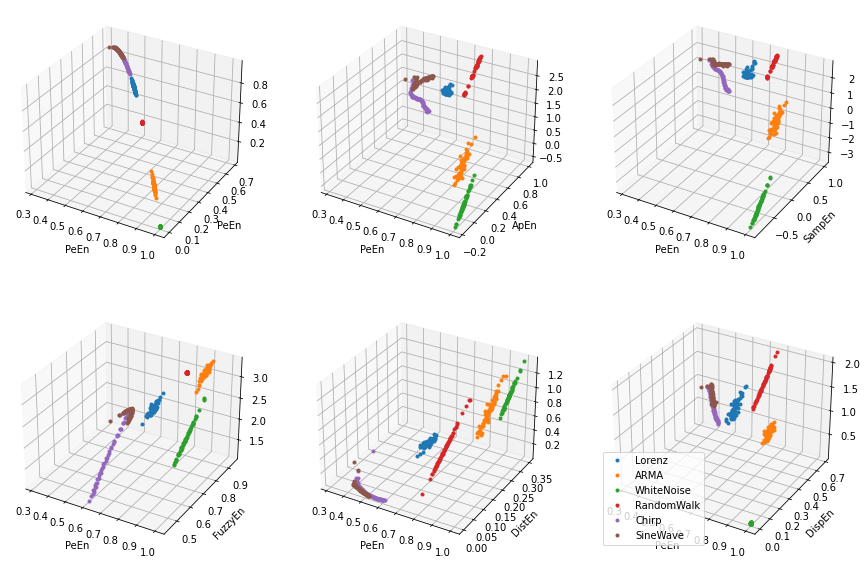

In [11]:
c = 0 
fig = plt.figure(figsize = (15,10))
for i in range(len(Entropy_ls)):
    fig.add_subplot(2,3,i+1,projection='3d')
    ##### Lorenz ###########
    Emergence = lorenz_entropies[Entropy_ls[c]]
    Self = 1 - lorenz_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Lorenz')
    
    ##### ARMA ###########
    Emergence = ARMA_entropies[Entropy_ls[c]]
    Self = 1 - ARMA_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'ARMA')
    
    ##### WhiteNoise ###########
    Emergence = WhiteNoise_entropies[Entropy_ls[c]]
    Self = 1 - WhiteNoise_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'WhiteNoise')
    
    ##### RandomWalk ###########
    Emergence = RandomWalk_entropies[Entropy_ls[c]]
    Self = 1 - RandomWalk_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'RandomWalk')
    
    ##### Chirp ###########
    Emergence = Chirp_entropies[Entropy_ls[c]]
    Self = 1 - Chirp_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Chirp')
    
    ##### SineWave ###########
    Emergence = SineWave_entropies[Entropy_ls[c]]
    Self = 1 - SineWave_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'SineWave')

    plt.xlabel(Entropy_ls[c], fontsize = 10)
    plt.ylabel(Entropy_ls[i], fontsize = 10)
plt.legend()    

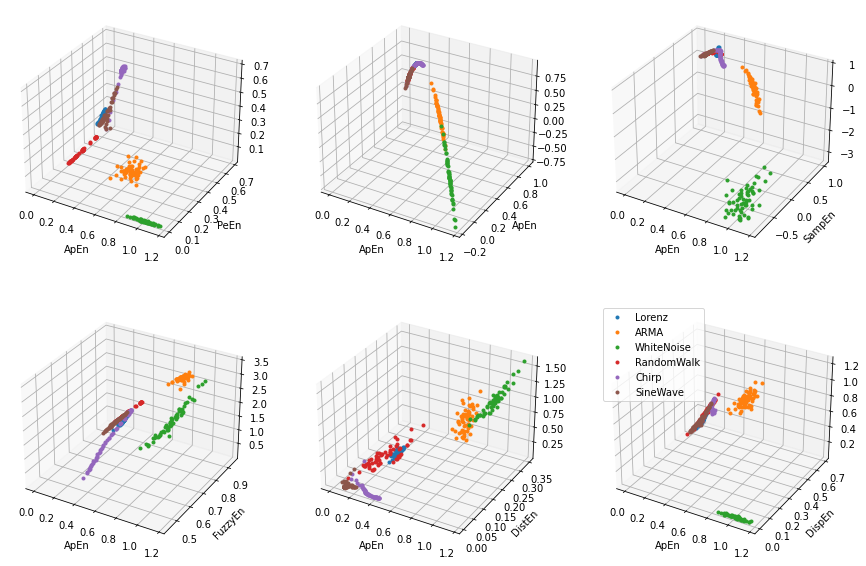

In [12]:
c = 1 
fig = plt.figure(figsize = (15,10))
for i in range(len(Entropy_ls)):
    fig.add_subplot(2,3,i+1,projection='3d')
    ##### Lorenz ###########
    Emergence = lorenz_entropies[Entropy_ls[c]]
    Self = 1 - lorenz_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Lorenz')
    
    ##### ARMA ###########
    Emergence = ARMA_entropies[Entropy_ls[c]]
    Self = 1 - ARMA_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'ARMA')
    
    ##### WhiteNoise ###########
    Emergence = WhiteNoise_entropies[Entropy_ls[c]]
    Self = 1 - WhiteNoise_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'WhiteNoise')
    
    ##### RandomWalk ###########
    Emergence = RandomWalk_entropies[Entropy_ls[c]]
    Self = 1 - RandomWalk_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'RandomWalk')
    
    ##### Chirp ###########
    Emergence = Chirp_entropies[Entropy_ls[c]]
    Self = 1 - Chirp_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Chirp')
    
    ##### SineWave ###########
    Emergence = SineWave_entropies[Entropy_ls[c]]
    Self = 1 - SineWave_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'SineWave')

    plt.xlabel(Entropy_ls[c], fontsize = 10)
    plt.ylabel(Entropy_ls[i], fontsize = 10)
plt.legend()    

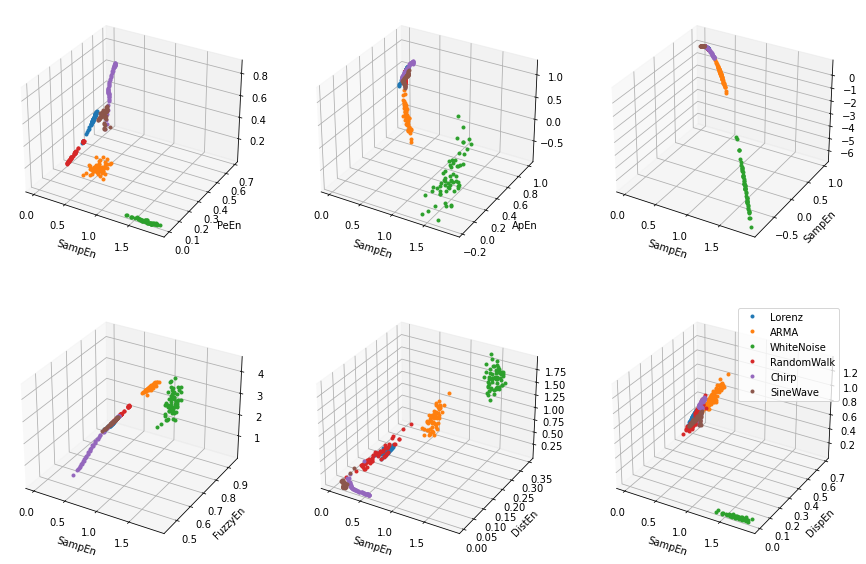

In [13]:
c = 2 
fig = plt.figure(figsize = (15,10))
for i in range(len(Entropy_ls)):
    fig.add_subplot(2,3,i+1,projection='3d')
    ##### Lorenz ###########
    Emergence = lorenz_entropies[Entropy_ls[c]]
    Self = 1 - lorenz_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Lorenz')
    
    ##### ARMA ###########
    Emergence = ARMA_entropies[Entropy_ls[c]]
    Self = 1 - ARMA_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'ARMA')
    
    ##### WhiteNoise ###########
    Emergence = WhiteNoise_entropies[Entropy_ls[c]]
    Self = 1 - WhiteNoise_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'WhiteNoise')
    
    ##### RandomWalk ###########
    Emergence = RandomWalk_entropies[Entropy_ls[c]]
    Self = 1 - RandomWalk_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'RandomWalk')
    
    ##### Chirp ###########
    Emergence = Chirp_entropies[Entropy_ls[c]]
    Self = 1 - Chirp_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Chirp')
    
    ##### SineWave ###########
    Emergence = SineWave_entropies[Entropy_ls[c]]
    Self = 1 - SineWave_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'SineWave')

    plt.xlabel(Entropy_ls[c], fontsize = 10)
    plt.ylabel(Entropy_ls[i], fontsize = 10)
plt.legend()    

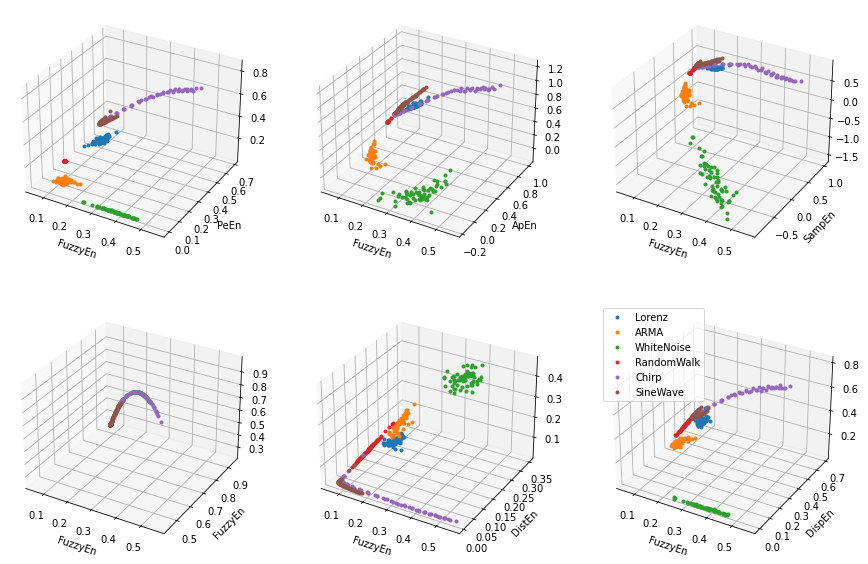

In [14]:
c = 3 
fig = plt.figure(figsize = (15,10))
for i in range(len(Entropy_ls)):
    fig.add_subplot(2,3,i+1,projection='3d')
    ##### Lorenz ###########
    Emergence = lorenz_entropies[Entropy_ls[c]]
    Self = 1 - lorenz_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Lorenz')
    
    ##### ARMA ###########
    Emergence = ARMA_entropies[Entropy_ls[c]]
    Self = 1 - ARMA_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'ARMA')
    
    ##### WhiteNoise ###########
    Emergence = WhiteNoise_entropies[Entropy_ls[c]]
    Self = 1 - WhiteNoise_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'WhiteNoise')
    
    ##### RandomWalk ###########
    Emergence = RandomWalk_entropies[Entropy_ls[c]]
    Self = 1 - RandomWalk_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'RandomWalk')
    
    ##### Chirp ###########
    Emergence = Chirp_entropies[Entropy_ls[c]]
    Self = 1 - Chirp_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Chirp')
    
    ##### SineWave ###########
    Emergence = SineWave_entropies[Entropy_ls[c]]
    Self = 1 - SineWave_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'SineWave')

    plt.xlabel(Entropy_ls[c], fontsize = 10)
    plt.ylabel(Entropy_ls[i], fontsize = 10)
plt.legend()    

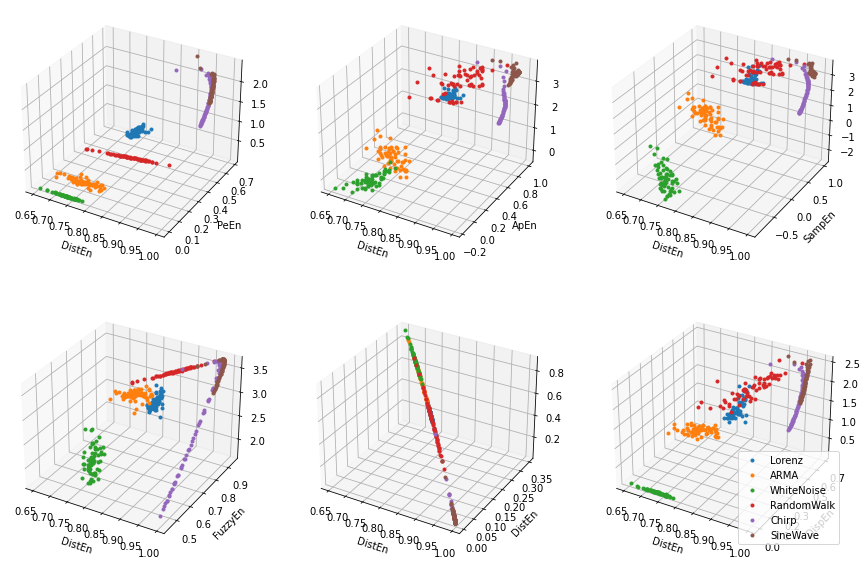

In [15]:
c = 4 
fig = plt.figure(figsize = (15,10))
for i in range(len(Entropy_ls)):
    fig.add_subplot(2,3,i+1,projection='3d')
    ##### Lorenz ###########
    Emergence = lorenz_entropies[Entropy_ls[c]]
    Self = 1 - lorenz_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Lorenz')
    
    ##### ARMA ###########
    Emergence = ARMA_entropies[Entropy_ls[c]]
    Self = 1 - ARMA_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'ARMA')
    
    ##### WhiteNoise ###########
    Emergence = WhiteNoise_entropies[Entropy_ls[c]]
    Self = 1 - WhiteNoise_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'WhiteNoise')
    
    ##### RandomWalk ###########
    Emergence = RandomWalk_entropies[Entropy_ls[c]]
    Self = 1 - RandomWalk_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'RandomWalk')
    
    ##### Chirp ###########
    Emergence = Chirp_entropies[Entropy_ls[c]]
    Self = 1 - Chirp_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Chirp')
    
    ##### SineWave ###########
    Emergence = SineWave_entropies[Entropy_ls[c]]
    Self = 1 - SineWave_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'SineWave')

    plt.xlabel(Entropy_ls[c], fontsize = 10)
    plt.ylabel(Entropy_ls[i], fontsize = 10)
plt.legend()    

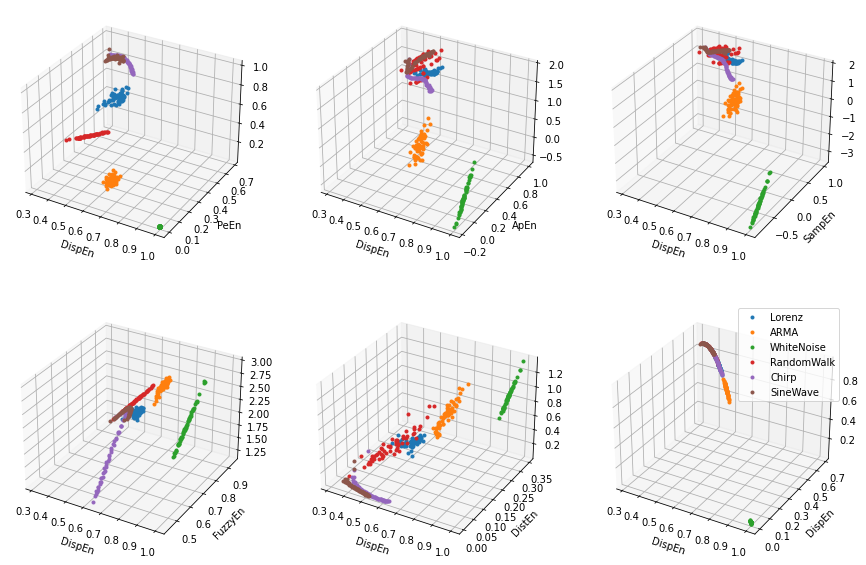

In [16]:
c = 5 
fig = plt.figure(figsize = (15,10))
for i in range(len(Entropy_ls)):
    fig.add_subplot(2,3,i+1,projection='3d')
    ##### Lorenz ###########
    Emergence = lorenz_entropies[Entropy_ls[c]]
    Self = 1 - lorenz_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Lorenz')
    
    ##### ARMA ###########
    Emergence = ARMA_entropies[Entropy_ls[c]]
    Self = 1 - ARMA_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'ARMA')
    
    ##### WhiteNoise ###########
    Emergence = WhiteNoise_entropies[Entropy_ls[c]]
    Self = 1 - WhiteNoise_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'WhiteNoise')
    
    ##### RandomWalk ###########
    Emergence = RandomWalk_entropies[Entropy_ls[c]]
    Self = 1 - RandomWalk_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'RandomWalk')
    
    ##### Chirp ###########
    Emergence = Chirp_entropies[Entropy_ls[c]]
    Self = 1 - Chirp_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'Chirp')
    
    ##### SineWave ###########
    Emergence = SineWave_entropies[Entropy_ls[c]]
    Self = 1 - SineWave_entropies[Entropy_ls[i]]
    Complexity = 4*Emergence*Self
    plt.plot(Emergence, Self, Complexity, marker = '.', linewidth = 0, label = 'SineWave')

    plt.xlabel(Entropy_ls[c], fontsize = 10)
    plt.ylabel(Entropy_ls[i], fontsize = 10)
plt.legend()    